# Reinforcement Learning Algorithm Comparison Plots
This notebook evaluates and compares **trained models** (DQN, PPO, A2C, and REINFORCE) on the PastureEnv environment, generating academic-style visualizations with **real evaluation data**.

In [ ]:

import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
import torch
import torch.nn as nn


NOTEBOOK_DIR = Path('.').resolve()  
PROJECT_ROOT = NOTEBOOK_DIR.parent  

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from environment.custom_env import make_env
from training.eval_utils import evaluate_policy
from stable_baselines3 import DQN, PPO, A2C


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

COLORS = {
    'DQN': '#0173B2',     
    'PPO': '#029E73',      
    'A2C': '#D55E00',      
    'REINFORCE': '#CC78BC' 
}


MODELS_DIR = PROJECT_ROOT / 'models'
DQN_MODEL_PATH = MODELS_DIR / 'dqn' / 'best_dqn.zip'
PPO_MODEL_PATH = MODELS_DIR / 'ppo' / 'best_ppo.zip'
A2C_MODEL_PATH = MODELS_DIR / 'a2c' / 'best_a2c.zip'
REINFORCE_MODEL_PATH = MODELS_DIR / 'reinforce' / 'best_reinforce.pt'

np.random.seed(42)
torch.manual_seed(42)

print(f"Project root: {PROJECT_ROOT}")
print(f"Models directory: {MODELS_DIR}")
print(f"Models directory exists: {MODELS_DIR.exists()}")
print()
print("Setup complete!")
print(f"DQN model exists: {DQN_MODEL_PATH.exists()} -> {DQN_MODEL_PATH}")
print(f"PPO model exists: {PPO_MODEL_PATH.exists()} -> {PPO_MODEL_PATH}")
print(f"A2C model exists: {A2C_MODEL_PATH.exists()} -> {A2C_MODEL_PATH}")
print(f"REINFORCE model exists: {REINFORCE_MODEL_PATH.exists()} -> {REINFORCE_MODEL_PATH}")

Project root: E:\school\Farmer_Decision_Agent
Models directory: E:\school\Farmer_Decision_Agent\models
Models directory exists: True

Setup complete!
DQN model exists: True -> E:\school\Farmer_Decision_Agent\models\dqn\best_dqn.zip
PPO model exists: True -> E:\school\Farmer_Decision_Agent\models\ppo\best_ppo.zip
A2C model exists: True -> E:\school\Farmer_Decision_Agent\models\a2c\best_a2c.zip
REINFORCE model exists: True -> E:\school\Farmer_Decision_Agent\models\reinforce\best_reinforce.pt


## Load Trained Models and Define REINFORCE Policy
Load all four trained models from disk for evaluation.

In [10]:
# 2) Define REINFORCE Policy class (same as training)
class ReinforcePolicy(nn.Module):
    def __init__(self, obs_dim: int, act_dim: int, hidden: int):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, hidden), nn.ReLU(),
            nn.Linear(hidden, hidden), nn.ReLU(),
            nn.Linear(hidden, act_dim)
        )
    
    def forward(self, x):
        return self.net(x)
    
    def predict(self, obs, deterministic=True):
        with torch.no_grad():
            if isinstance(obs, np.ndarray):
                x = torch.from_numpy(obs).float().unsqueeze(0)
            else:
                x = obs.float().unsqueeze(0)
            logits = self.forward(x)
            if deterministic:
                return int(torch.argmax(logits, dim=-1).item())
            else:
                probs = torch.softmax(logits, dim=-1)
                dist = torch.distributions.Categorical(probs)
                return int(dist.sample().item())

# 3) Load all models
print("Loading trained models...")

# Load DQN
env = make_env(render_mode=None)
dqn_model = DQN.load(str(DQN_MODEL_PATH), env=env)
env.close()
print("✓ DQN model loaded")

# Load PPO
env = make_env(render_mode=None)
ppo_model = PPO.load(str(PPO_MODEL_PATH), env=env)
env.close()
print("✓ PPO model loaded")

# Load A2C
env = make_env(render_mode=None)
a2c_model = A2C.load(str(A2C_MODEL_PATH), env=env)
env.close()
print("✓ A2C model loaded")

# Load REINFORCE
env = make_env(render_mode=None)
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.n
env.close()

ckpt = torch.load(REINFORCE_MODEL_PATH, map_location='cpu')
hidden = ckpt.get('config', {}).get('hidden_size', 128)
reinforce_model = ReinforcePolicy(obs_dim, act_dim, hidden)
reinforce_model.load_state_dict(ckpt['state_dict'])
reinforce_model.eval()
print("✓ REINFORCE model loaded")

print("\nAll models loaded successfully!")

Loading trained models...



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\user\miniconda3\envs\rl_rl\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\user\miniconda3\envs\rl_rl\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\user\miniconda3\envs\rl_rl\Lib\site-packages\ipykernel\kernelapp.py", line 758, in start
    self.io_loop.start()
  File "c:\Us

✓ DQN model loaded


c:\Users\user\miniconda3\envs\rl_rl\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: Can't get attribute 'FloatSchedule' on <module 'stable_baselines3.common.utils' from 'c:\\Users\\user\\miniconda3\\envs\\rl_rl\\Lib\\site-packages\\stable_baselines3\\common\\utils.py'>
  warnings.warn(
c:\Users\user\miniconda3\envs\rl_rl\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: Can't get attribute 'FloatSchedule' on <module 'stable_baselines3.common.utils' from 'c:\\Users\\user\\miniconda3\\envs\\rl_rl\\Lib\\site-packages\\stable_baselines3\\common\\utils.py'>
  warnings.warn(


✓ PPO model loaded
✓ A2C model loaded
✓ REINFORCE model loaded

All models loaded successfully!


In [ ]:

NUM_EVAL_EPISODES = 20

def evaluate_model_detailed(model, model_name, episodes=NUM_EVAL_EPISODES):
    """Evaluate model and return per-episode rewards and stats."""
    env_fn = lambda: make_env(render_mode=None)
    
    episode_rewards = []
    episode_lengths = []
    episode_hunger = []
    episode_thirst = []
    
    for ep in range(episodes):
        env = env_fn()
        obs, info = env.reset()
        done = False
        ep_reward = 0.0
        steps = 0
        step_hunger = []
        step_thirst = []
        
        while not done:
           
            if hasattr(model, 'predict') and hasattr(model, 'policy'):
               
                import torch as th
                obs_tensor = th.tensor(obs.tolist(), dtype=th.float32, device=model.device)
                obs_tensor = obs_tensor.unsqueeze(0) 
                with th.no_grad():
                    action_tensor = model.policy._predict(obs_tensor, deterministic=True)
                    action = int(action_tensor.cpu().item()) 
            elif hasattr(model, 'predict'):
               
                obs_list = obs.tolist() if hasattr(obs, 'tolist') else list(obs)
                obs_tensor = torch.tensor(obs_list, dtype=torch.float32)
                action = model.predict(obs_tensor, deterministic=True)
                if not isinstance(action, int):
                    action = int(action)
            else:
                obs_list = obs.tolist() if hasattr(obs, 'tolist') else list(obs)
                obs_tensor = torch.tensor(obs_list, dtype=torch.float32)
                action = int(model.predict(obs_tensor))
            
            obs, r, terminated, truncated, info = env.step(action)
            ep_reward += r
            steps += 1
            done = terminated or truncated
            step_hunger.append(info.get('hunger', 0.0))
            step_thirst.append(info.get('thirst', 0.0))
        
        episode_rewards.append(ep_reward)
        episode_lengths.append(steps)
        episode_hunger.append(float(sum(step_hunger)) / len(step_hunger))
        episode_thirst.append(float(sum(step_thirst)) / len(step_thirst))
        env.close()
        
        if (ep + 1) % 5 == 0:
            print(f"  {model_name}: Episode {ep+1}/{episodes} - Reward: {ep_reward:.1f}")
    
    return {
        'name': model_name,
        'episode_rewards': episode_rewards,
        'episode_lengths': episode_lengths,
        'episode_hunger': episode_hunger,
        'episode_thirst': episode_thirst,
        'avg_reward': sum(episode_rewards) / len(episode_rewards),
        'std_reward': (sum((x - sum(episode_rewards)/len(episode_rewards))**2 for x in episode_rewards) / len(episode_rewards))**0.5,
        'avg_length': sum(episode_lengths) / len(episode_lengths),
        'mean_hunger': sum(episode_hunger) / len(episode_hunger),
        'mean_thirst': sum(episode_thirst) / len(episode_thirst),
    }

print(f"Evaluating all models ({NUM_EVAL_EPISODES} episodes each)...\n")

print("Evaluating DQN...")
dqn_results = evaluate_model_detailed(dqn_model, 'DQN')

print("\nEvaluating PPO...")
ppo_results = evaluate_model_detailed(ppo_model, 'PPO')

print("\nEvaluating A2C...")
a2c_results = evaluate_model_detailed(a2c_model, 'A2C')

print("\nEvaluating REINFORCE...")
reinforce_results = evaluate_model_detailed(reinforce_model, 'REINFORCE')

all_results = {
    'DQN': dqn_results,
    'PPO': ppo_results,
    'A2C': a2c_results,
    'REINFORCE': reinforce_results
}

print("\n" + "="*60)
print("EVALUATION COMPLETE - Summary:")
print("="*60)
for name, res in all_results.items():
    print(f"{name:12s}: Avg Reward = {res['avg_reward']:7.1f} ± {res['std_reward']:5.1f}")
print("="*60)

Evaluating all models (20 episodes each)...

Evaluating DQN...
  DQN: Episode 5/20 - Reward: 405.0
  DQN: Episode 10/20 - Reward: 398.8
  DQN: Episode 15/20 - Reward: 403.3
  DQN: Episode 5/20 - Reward: 405.0
  DQN: Episode 10/20 - Reward: 398.8
  DQN: Episode 15/20 - Reward: 403.3
  DQN: Episode 20/20 - Reward: 409.0

Evaluating PPO...
  DQN: Episode 20/20 - Reward: 409.0

Evaluating PPO...
  PPO: Episode 5/20 - Reward: 400.2
  PPO: Episode 10/20 - Reward: 410.7
  PPO: Episode 5/20 - Reward: 400.2
  PPO: Episode 10/20 - Reward: 410.7
  PPO: Episode 15/20 - Reward: 405.5
  PPO: Episode 15/20 - Reward: 405.5
  PPO: Episode 20/20 - Reward: 410.0

Evaluating A2C...
  A2C: Episode 5/20 - Reward: 399.4
  PPO: Episode 20/20 - Reward: 410.0

Evaluating A2C...
  A2C: Episode 5/20 - Reward: 399.4
  A2C: Episode 10/20 - Reward: 415.3
  A2C: Episode 10/20 - Reward: 415.3
  A2C: Episode 15/20 - Reward: 393.9
  A2C: Episode 20/20 - Reward: 390.1

Evaluating REINFORCE...
  A2C: Episode 15/20 - Rewar

## Plot 1: Episode Rewards Comparison (Box Plot + Scatter)
Visualize the distribution of rewards across all 20 evaluation episodes for each algorithm.

C:\Users\user\AppData\Local\Temp\ipykernel_5052\3247096979.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_plot, labels=algorithms, patch_artist=True,


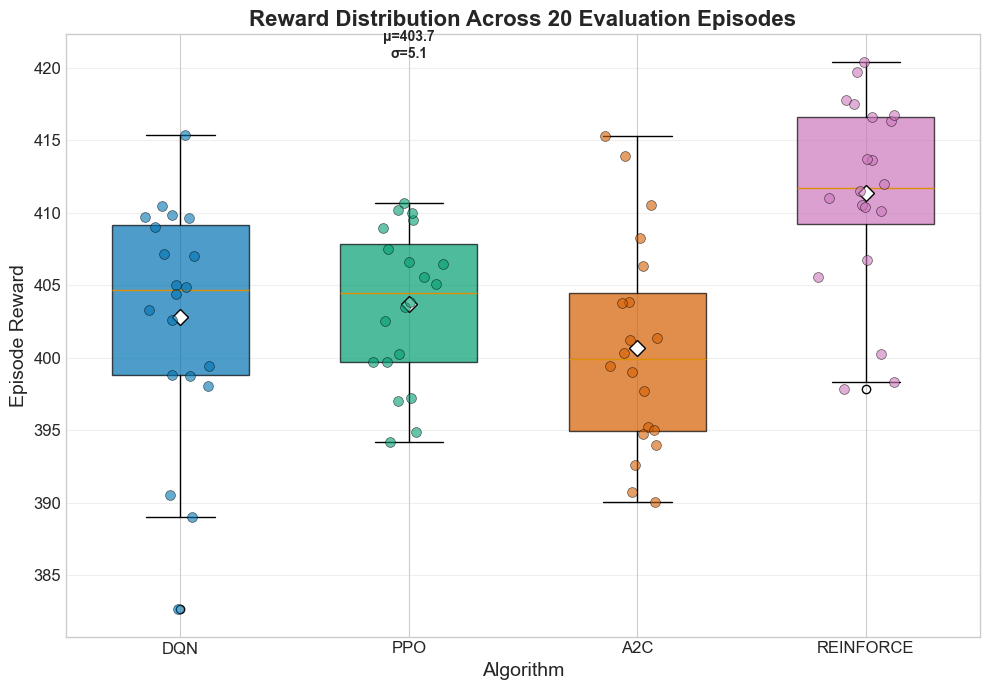

In [ ]:

fig, ax = plt.subplots(figsize=(10, 7))

algorithms = ['DQN', 'PPO', 'A2C', 'REINFORCE']
data_for_plot = [all_results[alg]['episode_rewards'] for alg in algorithms]
colors_list = [COLORS[alg] for alg in algorithms]


bp = ax.boxplot(data_for_plot, labels=algorithms, patch_artist=True, 
                widths=0.6, showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='white', markeredgecolor='black', markersize=8))

for patch, color in zip(bp['boxes'], colors_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

for i, (alg, rewards) in enumerate(zip(algorithms, data_for_plot)):
    x = np.random.normal(i + 1, 0.08, size=len(rewards))
    ax.scatter(x, rewards, alpha=0.6, color=COLORS[alg], edgecolor='black', 
               linewidth=0.5, s=50, zorder=3)

for i, alg in enumerate(algorithms):
    mean_val = all_results[alg]['avg_reward']
    std_val = all_results[alg]['std_reward']
    ax.annotate(f'μ={mean_val:.1f}\nσ={std_val:.1f}', 
                xy=(i + 1, max(all_results[alg]['episode_rewards']) + 10),
                ha='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Episode Reward', fontsize=14)
ax.set_title(f'Reward Distribution Across {NUM_EVAL_EPISODES} Evaluation Episodes', 
             fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('reward_distribution_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

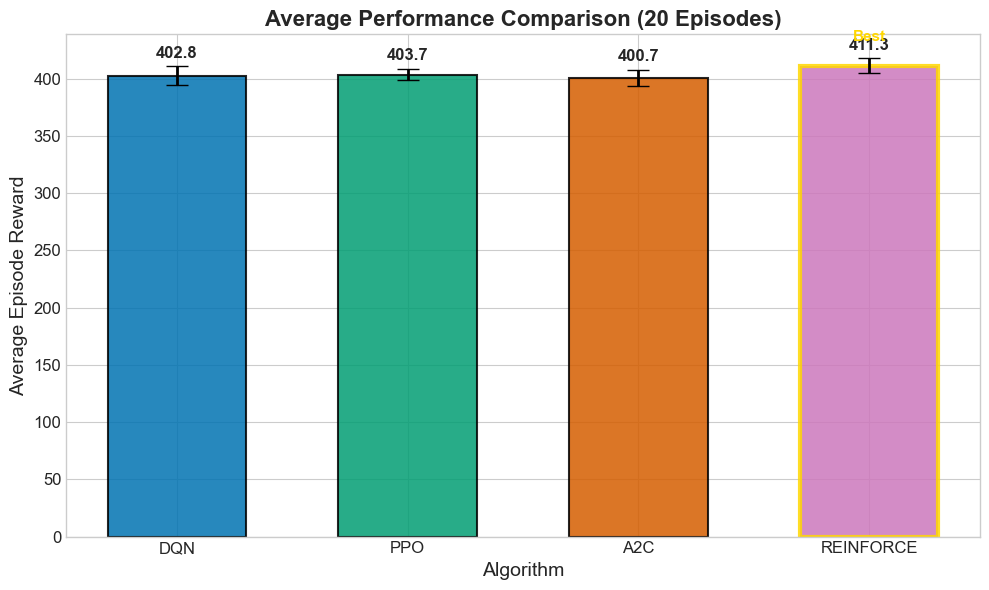

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))

algorithms = ['DQN', 'PPO', 'A2C', 'REINFORCE']
avg_rewards = [all_results[alg]['avg_reward'] for alg in algorithms]
std_rewards = [all_results[alg]['std_reward'] for alg in algorithms]
colors_list = [COLORS[alg] for alg in algorithms]


bars = ax.bar(algorithms, avg_rewards, yerr=std_rewards, capsize=8, 
              color=colors_list, edgecolor='black', linewidth=1.5, 
              width=0.6, alpha=0.85, error_kw={'linewidth': 2})


for i, (bar, avg, std) in enumerate(zip(bars, avg_rewards, std_rewards)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + std + 5, 
            f'{avg:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

best_idx = np.argmax(avg_rewards)
bars[best_idx].set_edgecolor('gold')
bars[best_idx].set_linewidth(3)
ax.annotate('Best', xy=(best_idx, avg_rewards[best_idx] + std_rewards[best_idx] + 15), 
            fontsize=11, ha='center', color='gold', fontweight='bold')

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Average Episode Reward', fontsize=14)
ax.set_title(f'Average Performance Comparison ({NUM_EVAL_EPISODES} Episodes)', 
             fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('average_reward_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot 3: Multi-Metric Comparison (Radar Chart Style - Bar Groups)
Compare algorithms across multiple metrics: Reward, Episode Length, Hunger Management, Thirst Management.

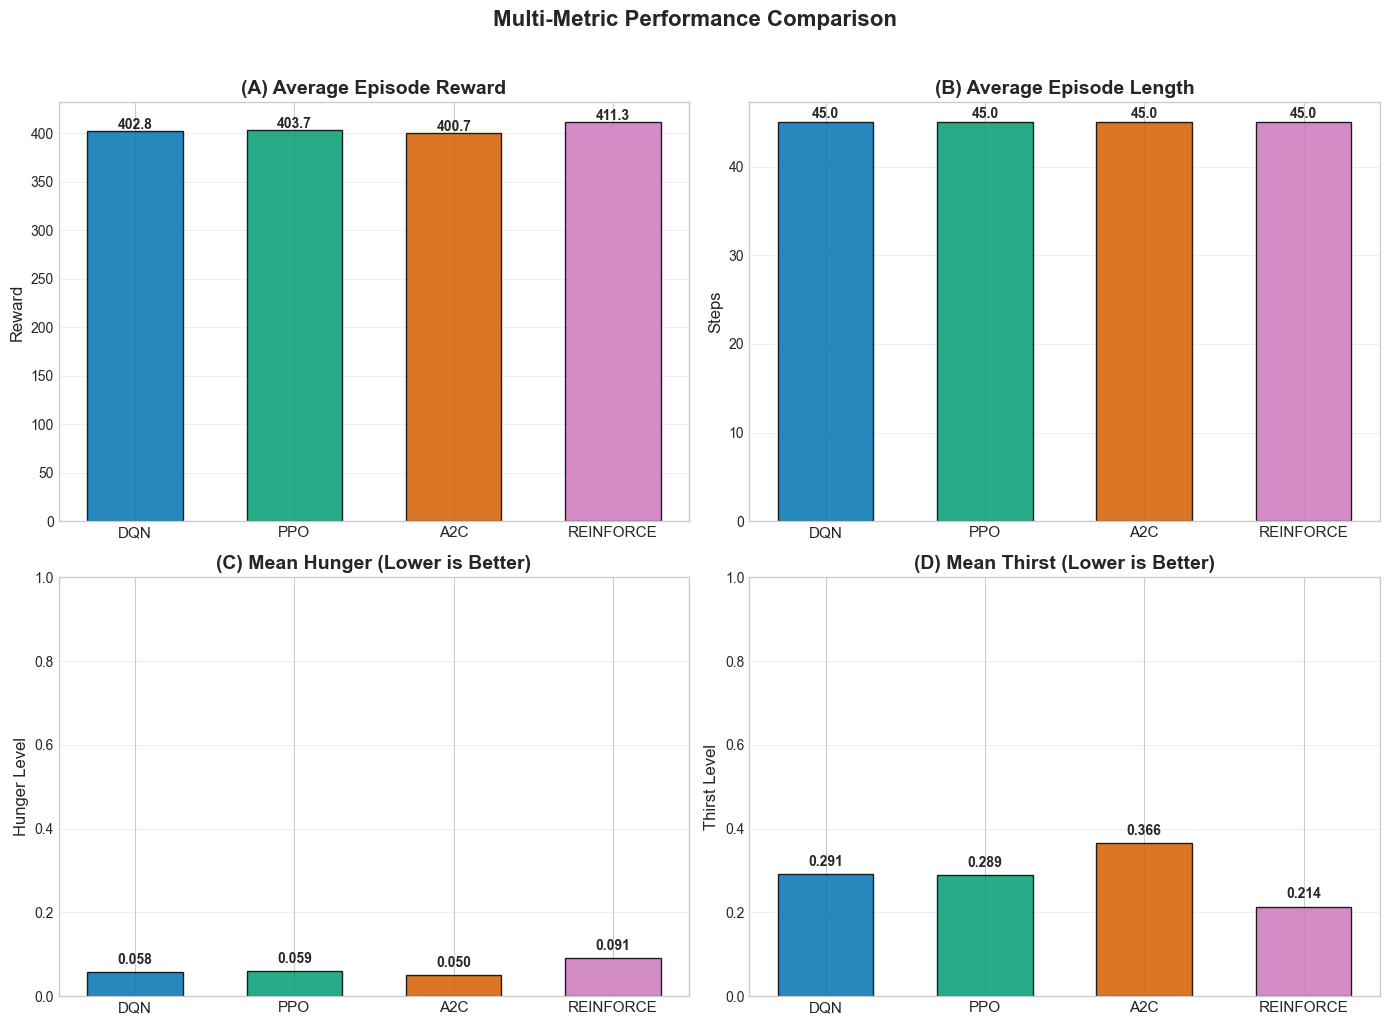

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

algorithms = ['DQN', 'PPO', 'A2C', 'REINFORCE']
x = np.arange(len(algorithms))
width = 0.6

ax1 = axes[0, 0]
rewards = [all_results[alg]['avg_reward'] for alg in algorithms]
bars1 = ax1.bar(x, rewards, width, color=[COLORS[a] for a in algorithms], 
                edgecolor='black', alpha=0.85)
ax1.set_ylabel('Reward', fontsize=12)
ax1.set_title('(A) Average Episode Reward', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms, fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars1, rewards):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2, 
             f'{val:.1f}', ha='center', fontsize=10, fontweight='bold')


ax2 = axes[0, 1]
lengths = [all_results[alg]['avg_length'] for alg in algorithms]
bars2 = ax2.bar(x, lengths, width, color=[COLORS[a] for a in algorithms], 
                edgecolor='black', alpha=0.85)
ax2.set_ylabel('Steps', fontsize=12)
ax2.set_title('(B) Average Episode Length', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(algorithms, fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars2, lengths):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5, 
             f'{val:.1f}', ha='center', fontsize=10, fontweight='bold')

ax3 = axes[1, 0]
hunger = [all_results[alg]['mean_hunger'] for alg in algorithms]
bars3 = ax3.bar(x, hunger, width, color=[COLORS[a] for a in algorithms], 
                edgecolor='black', alpha=0.85)
ax3.set_ylabel('Hunger Level', fontsize=12)
ax3.set_title('(C) Mean Hunger (Lower is Better)', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(algorithms, fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, 1)
for bar, val in zip(bars3, hunger):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02, 
             f'{val:.3f}', ha='center', fontsize=10, fontweight='bold')

ax4 = axes[1, 1]
thirst = [all_results[alg]['mean_thirst'] for alg in algorithms]
bars4 = ax4.bar(x, thirst, width, color=[COLORS[a] for a in algorithms], 
                edgecolor='black', alpha=0.85)
ax4.set_ylabel('Thirst Level', fontsize=12)
ax4.set_title('(D) Mean Thirst (Lower is Better)', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(algorithms, fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_ylim(0, 1)
for bar, val in zip(bars4, thirst):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02, 
             f'{val:.3f}', ha='center', fontsize=10, fontweight='bold')

plt.suptitle('Multi-Metric Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('multi_metric_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Summary Statistics Table
Final performance metrics for all algorithms based on real evaluation data.

In [ ]:

algorithms = ['DQN', 'PPO', 'A2C', 'REINFORCE']

avg_rewards = {alg: all_results[alg]['avg_reward'] for alg in algorithms}
sorted_by_reward = sorted(avg_rewards.items(), key=lambda x: x[1], reverse=True)
rankings = {alg: rank+1 for rank, (alg, _) in enumerate(sorted_by_reward)}

std_rewards = {alg: all_results[alg]['std_reward'] for alg in algorithms}
sorted_by_std = sorted(std_rewards.items(), key=lambda x: x[1])
stability_labels = {sorted_by_std[0][0]: 'Excellent', sorted_by_std[1][0]: 'Good', 
                    sorted_by_std[2][0]: 'Moderate', sorted_by_std[3][0]: 'Poor'}

summary_data = {
    'Algorithm': algorithms,
    'Avg Reward': [f"{all_results[alg]['avg_reward']:.1f}" for alg in algorithms],
    'Std Reward': [f"{all_results[alg]['std_reward']:.1f}" for alg in algorithms],
    'Avg Episode Length': [f"{all_results[alg]['avg_length']:.1f}" for alg in algorithms],
    'Mean Hunger': [f"{all_results[alg]['mean_hunger']:.3f}" for alg in algorithms],
    'Mean Thirst': [f"{all_results[alg]['mean_thirst']:.3f}" for alg in algorithms],
    'Stability': [stability_labels.get(alg, 'N/A') for alg in algorithms],
    'Rank': [rankings[alg] for alg in algorithms]
}

df_summary = pd.DataFrame(summary_data)

print("=" * 90)
print(f"REINFORCEMENT LEARNING ALGORITHM COMPARISON SUMMARY ({NUM_EVAL_EPISODES} Episodes)")
print("=" * 90)
print(df_summary.to_string(index=False))
print("=" * 90)


best_alg = sorted_by_reward[0][0]
best_reward = sorted_by_reward[0][1]
print(f"\n🏆 BEST PERFORMER: {best_alg} with average reward of {best_reward:.1f}")

results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Avg_Reward': [all_results[alg]['avg_reward'] for alg in algorithms],
    'Std_Reward': [all_results[alg]['std_reward'] for alg in algorithms],
    'Avg_Length': [all_results[alg]['avg_length'] for alg in algorithms],
    'Mean_Hunger': [all_results[alg]['mean_hunger'] for alg in algorithms],
    'Mean_Thirst': [all_results[alg]['mean_thirst'] for alg in algorithms],
})
results_df.to_csv('evaluation_results_summary.csv', index=False)
print("\n✓ Results saved to 'evaluation_results_summary.csv'")

REINFORCEMENT LEARNING ALGORITHM COMPARISON SUMMARY (20 Episodes)
Algorithm Avg Reward Std Reward Avg Episode Length Mean Hunger Mean Thirst Stability  Rank
      DQN      402.8        7.9               45.0       0.058       0.291      Poor     3
      PPO      403.7        5.1               45.0       0.059       0.289 Excellent     2
      A2C      400.7        7.2               45.0       0.050       0.366  Moderate     4
REINFORCE      411.3        6.5               45.0       0.091       0.214      Good     1

🏆 BEST PERFORMER: REINFORCE with average reward of 411.3

✓ Results saved to 'evaluation_results_summary.csv'


## Plot 4: Episode-by-Episode Performance
Line plot showing reward trajectory across all evaluation episodes.

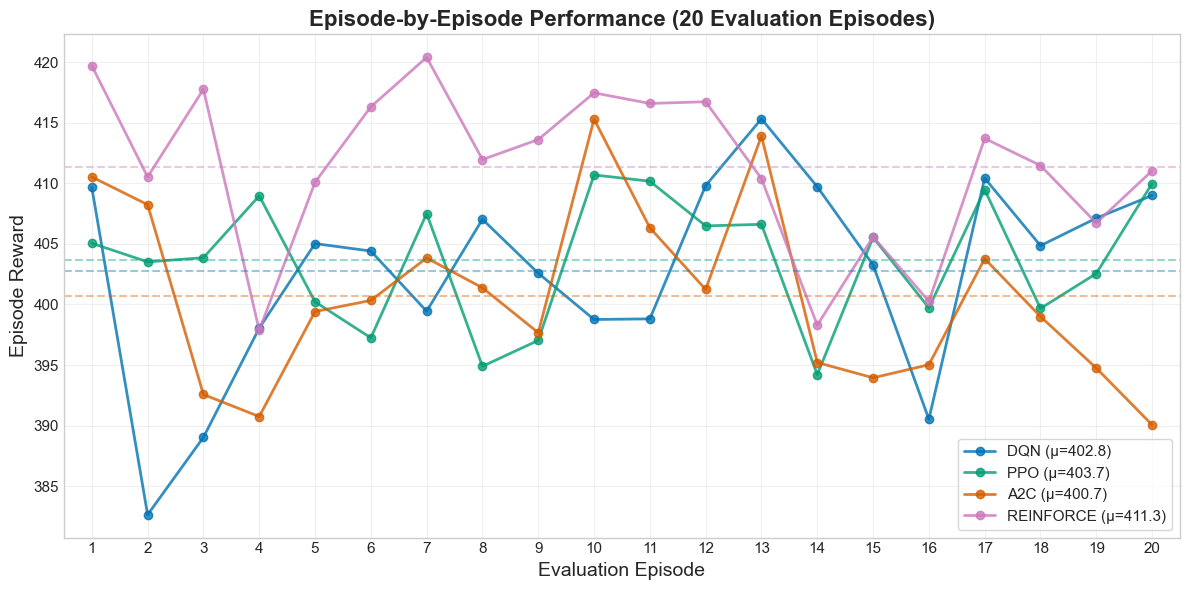

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))

algorithms = ['DQN', 'PPO', 'A2C', 'REINFORCE']
episodes_x = np.arange(1, NUM_EVAL_EPISODES + 1)

for alg in algorithms:
    rewards = all_results[alg]['episode_rewards']
    ax.plot(episodes_x, rewards, marker='o', markersize=6, linewidth=2, 
            color=COLORS[alg], label=f"{alg} (μ={all_results[alg]['avg_reward']:.1f})", alpha=0.8)


for alg in algorithms:
    ax.axhline(y=all_results[alg]['avg_reward'], color=COLORS[alg], 
               linestyle='--', alpha=0.4, linewidth=1.5)

ax.set_xlabel('Evaluation Episode', fontsize=14)
ax.set_ylabel('Episode Reward', fontsize=14)
ax.set_title(f'Episode-by-Episode Performance ({NUM_EVAL_EPISODES} Evaluation Episodes)', 
             fontsize=16, fontweight='bold')
ax.legend(loc='lower right', fontsize=11, frameon=True, fancybox=True)
ax.set_xlim(0.5, NUM_EVAL_EPISODES + 0.5)
ax.set_xticks(episodes_x)
ax.tick_params(axis='both', labelsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('episode_performance_lines.png', dpi=300, bbox_inches='tight')
plt.show()